<a href="https://colab.research.google.com/github/KnightMafiaLau/CryptoTech/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparing the data

In [ ]:
#import the original dataset
from google.colab import files
files.upload()

Saving Absenteeism_at_work.csv to Absenteeism_at_work.csv


{'Absenteeism_at_work.csv': b'\xef\xbb\xbfID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day ,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours\r\n11,26,7,3,1,289,36,13,33,"239,554",97,0,1,2,1,0,1,90,172,30,4\r\n36,0,7,3,1,118,13,18,50,"239,554",97,1,1,1,1,0,0,98,178,31,0\r\n3,23,7,4,1,179,51,18,38,"239,554",97,0,1,0,1,0,0,89,170,31,2\r\n7,7,7,5,1,279,5,14,39,"239,554",97,0,1,2,1,1,0,68,168,24,4\r\n11,23,7,5,1,289,36,13,33,"239,554",97,0,1,2,1,0,1,90,172,30,2\r\n3,23,7,6,1,179,51,18,38,"239,554",97,0,1,0,1,0,0,89,170,31,2\r\n10,22,7,6,1,361,52,3,28,"239,554",97,0,1,1,1,0,4,80,172,27,8\r\n20,23,7,6,1,260,50,11,36,"239,554",97,0,1,4,1,0,0,65,168,23,4\r\n14,19,7,2,1,155,12,14,34,"239,554",97,0,1,2,1,0,0,95,196,25,40\r\n1,22,7,2,1,235,11,14,37,"239,554",97,0,3,1,0,0,1,88,172,29,8\r\n20,1,7,2,1,260,50,1

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from sklearn import linear_model

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.preprocessing import OrdinalEncoder

In [ ]:
customer_df = pd.read_csv ('marketing_campaign.csv', sep = '\t')
customer_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
print (customer_df.describe(include = 'all'))
print (customer_df.isna().sum())

                  ID   Year_Birth   Education Marital_Status         Income      Kidhome     Teenhome Dt_Customer      Recency     MntWines    MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue     Response
count    2240.000000  2240.000000        2240           2240    2216.000000  2240.000000  2240.000000        2240  2240.000000  2240.000000  2240.000000      2240.000000      2240.000000       2240.000000   2240.000000        2240.000000      2240.000000          2240.000000        2240.000000        2240.000000   2240.000000   2240.000000   2240.000000   2240.000000   2240.000000  2240.000000         2240.0     2240.0  2240.000000
unique           NaN          NaN           5              8            NaN          NaN          NaN         663          NaN  

From the briefing of the dataset we could find that there are some outliers and missing data in it. For example, the minimum value of the year of birth is 1893, meaning the customer is over 100 year-old, which is very impossible. And the maximum value of the income is 666666, which is also may not be a real value. Since the missing data only occur in income and not many, we can simply delete those rows.

In [ ]:
#delete the NaN rows
customer_df.dropna(subset = ['Income'], inplace = True)

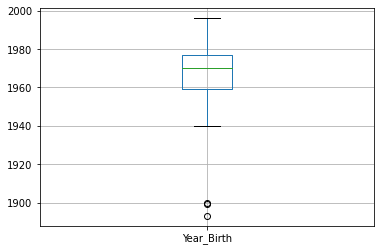

In [ ]:
#For further exporation of the dataset to identify the outlier, I would like to use the boxplot
customer_df.boxplot (column = ['Year_Birth'])

So we need to delete those customers whose birth year is older than 1900

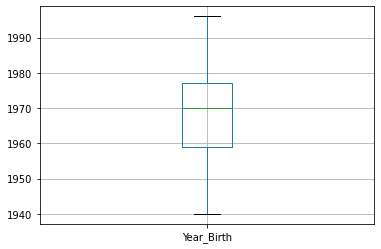

In [ ]:
cleaned_df = customer_df[customer_df['Year_Birth'] > 1900]
cleaned_df.boxplot (column = ['Year_Birth'])

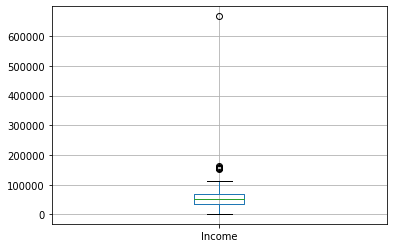

In [ ]:
customer_df.boxplot (column = ['Income']) 


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1245,6862,1971,Graduation,Divorced,1730.0,0,0,18-05-2014,65,1,1,3,1,1,1,15,0,0,0,20,0,0,0,0,0,0,3,11,0
21,5376,1979,Graduation,Married,2447.0,1,0,06-01-2013,42,1,1,1725,1,1,1,15,0,28,0,1,0,0,0,0,0,0,3,11,0
1524,11110,1973,Graduation,Single,3502.0,1,0,13-04-2013,56,2,1,1,0,0,1,0,0,0,0,14,0,0,0,0,0,0,3,11,0
1846,9931,1963,PhD,Married,4023.0,1,1,23-06-2014,29,5,0,1,1,1,1,15,0,0,0,19,0,0,0,0,0,0,3,11,0
1975,10311,1969,Graduation,Married,4428.0,0,1,05-10-2013,0,16,4,12,2,4,321,0,25,0,0,1,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0
617,1503,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,3,11,0


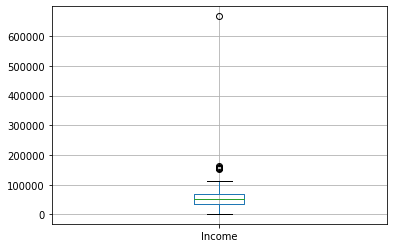

In [ ]:
#0 is not we want, so delete
cleaned_df = cleaned_df[cleaned_df['Income'] != 'NaN']
cleaned_df.boxplot (column = ['Income']) 
cleaned_df.sort_values(by = ['Income'])

In [ ]:
#There are some outliers which are far more higher than the most customers, so we just delete them
Q1 = cleaned_df['Income'].quantile(0.25)

Q3 = cleaned_df['Income'].quantile(0.75)

IQR = Q3 - Q1

Upper_Fence = Q3 + (1.5 * IQR)
Lower_Fence = Q1 - (1.5 * IQR)
print (Upper_Fence)

118348.5


In [ ]:
print (Upper_Fence)

118348.5


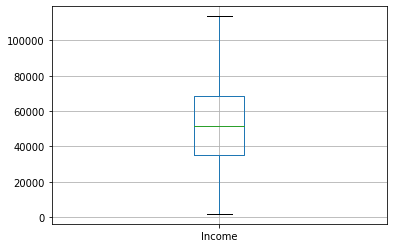

In [ ]:
cleaned_df = cleaned_df[cleaned_df['Income'] <= 118351]
cleaned_df.boxplot (column = ['Income'])

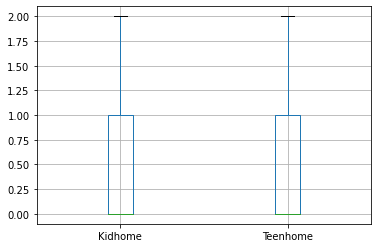

In [ ]:
customer_df.boxplot (column = ['Kidhome', 'Teenhome']) 

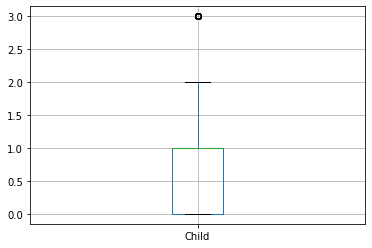

In [ ]:
#we could integrate these two part as 'child'
cleaned_df['Child'] = cleaned_df.Kidhome + cleaned_df.Teenhome
cleaned_df.boxplot (column = ['Child']) 

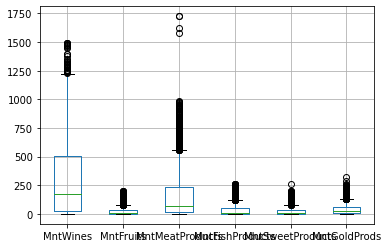

In [ ]:
customer_df.boxplot (column = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']) 

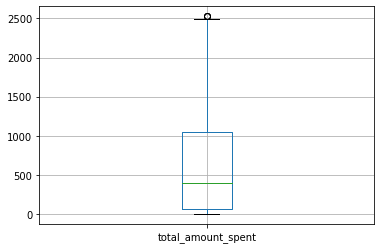

In [ ]:
#we would also add a new column as 'total_spent' in which every customer total amount spent
cleaned_df['total_amount_spent']= cleaned_df.MntWines + cleaned_df.MntFruits + cleaned_df.MntMeatProducts + cleaned_df.MntFishProducts + cleaned_df.MntSweetProducts + cleaned_df.MntGoldProds
cleaned_df.boxplot (column = ['total_amount_spent']) 

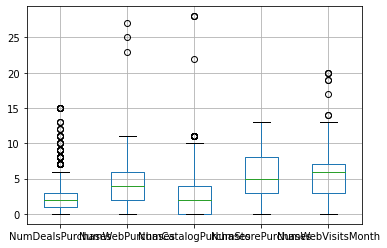

In [ ]:
customer_df.boxplot (column = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']) 

In [ ]:
object_column = customer_df.select_dtypes(include=['object']).columns

In [ ]:
for i in object_column:
  print (cleaned_df[i].value_counts())

Graduation    1113
PhD            476
Master         364
2n Cycle       198
Basic           54
Name: Education, dtype: int64
Married     854
Together    568
Single      470
Divorced    230
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
31-08-2012    12
12-05-2014    11
12-09-2012    11
14-02-2013    11
22-05-2014    10
              ..
09-03-2013     1
16-05-2013     1
20-07-2013     1
26-12-2012     1
15-04-2014     1
Name: Dt_Customer, Length: 662, dtype: int64


In [ ]:
#make the dt_customer into datetime64 data type
cleaned_df['Dt_Customer'] = pd.to_datetime(cleaned_df['Dt_Customer'])
cleaned_df['Dt_Customer']

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2205, dtype: datetime64[ns]

The martial status are quite messy, we will just put them to 'Single', 'in a relationship' and 'married'. 'Single' would contain single, divorced and alone. 'relationship' would contain together, absurd and yolo; 'married' will contain married.

In [ ]:
cleaned_df['Marital_Status'] = cleaned_df['Marital_Status'].apply(lambda x: 'Single' if (x == 'Single' or x == 'Divorced' or x == 'Alone')  else ('Relationship' if (x == 'Together' or x == 'Absurd' or x == 'YOLO') else 'Married'))


In [ ]:
print (cleaned_df['Marital_Status'].value_counts())

Married         930
Single          703
Relationship    572
Name: Marital_Status, dtype: int64


In [ ]:
#to clean the education column
cleaned_df['Education'].value_counts()


Graduation    1113
PhD            476
Master         364
2n Cycle       198
Basic           54
Name: Education, dtype: int64

In [ ]:
#2n cycle degree = master degree
cleaned_df['Education'] = cleaned_df['Education'].apply(lambda x: 'Master' if x == '2n Cycle' else x)
cleaned_df['Education'].value_counts()

Graduation    1113
Master         562
PhD            476
Basic           54
Name: Education, dtype: int64

In [ ]:
cleaned_df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Child,total_amount_spent
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.0,2205.0,2205.00000,2205.000000,2205.000000
mean,5585.439456,1968.904308,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583,5.336961,0.073923,0.074376,0.073016,0.064399,0.013605,0.009070,3.0,11.0,0.15102,0.948753,606.821769
std,3247.546423,11.705801,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796,2.413535,0.261705,0.262442,0.260222,0.245518,0.115872,0.094827,0.0,0.0,0.35815,0.749231,601.675284
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,0.000000,5.000000
25%,2815.000000,1959.000000,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,0.000000,69.000000
50%,5455.000000,1970.000000,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,1.000000,397.000000
75%,8418.000000,1977.000000,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,1.000000,1047.000000
max,11191.000000,1996.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.00000,3.000000,2525.000000


#Data Visualization

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

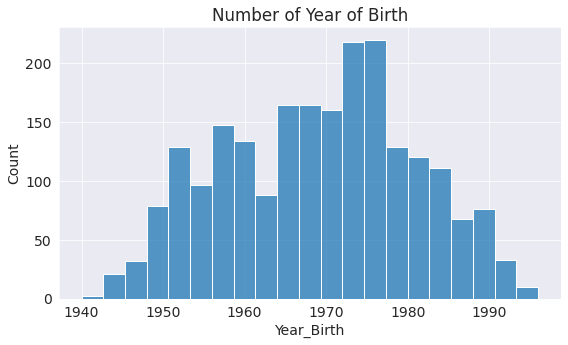

In [ ]:
sns.histplot(cleaned_df.Year_Birth)
plt.title('Number of Year of Birth');

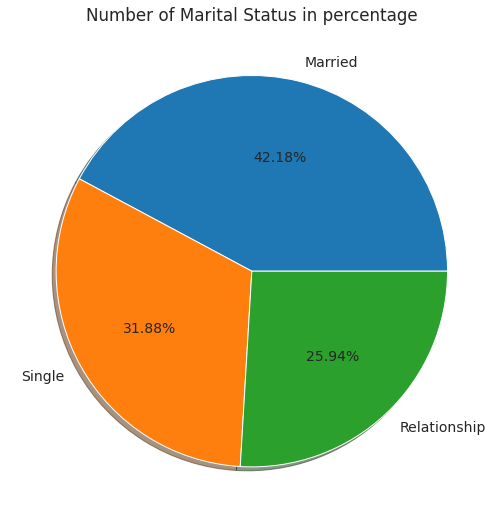

In [ ]:
plt.figure(figsize=(9,9))
plt.title('Number of Marital Status in percentage')
plt.pie(cleaned_df.Marital_Status.value_counts(), labels=cleaned_df.Marital_Status.value_counts().index, autopct='%1.2f%%',shadow=True);

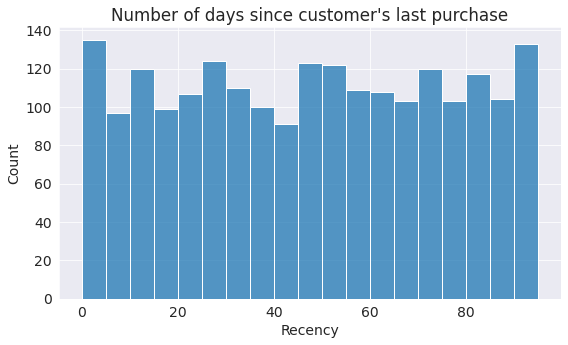

In [ ]:
import numpy as np
sns.histplot(cleaned_df.Recency, bins=np.arange(0,100,5))
plt.title("Number of days since customer's last purchase");

Text(0.5, 1.0, 'Number of child home in percentage')

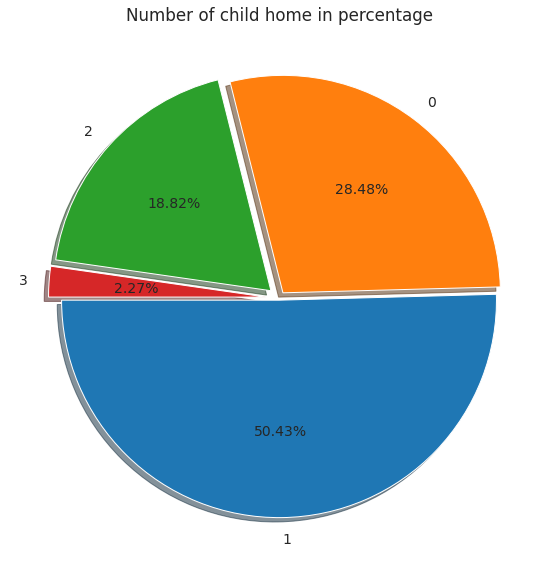

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(cleaned_df.Child.value_counts(), labels = cleaned_df.Child.value_counts().index ,autopct="%1.2f%%", explode=[0.01, 0.03, 0.05, 0.06], shadow=True, startangle=180)
plt.title('Number of child home in percentage')

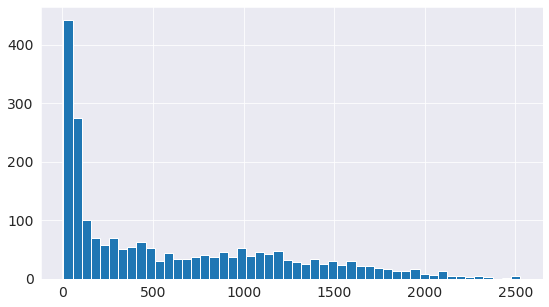

In [ ]:
cleaned_df["total_amount_spent"].hist(bins=50)

#Answering the question

##What is the average rate of reponses per visits?

In [ ]:
average_rate = cleaned_df['Response'].sum() / cleaned_df['NumWebVisitsMonth'].sum()
average_rate

0.02829707681849082

##Does the income effect the reponse?

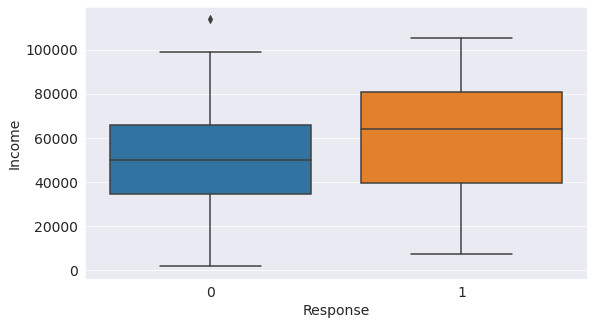

In [ ]:
sns.boxplot(x='Response', y='Income', data= cleaned_df)

From the box plot, we could see that the income of those response is higher than those do not response.

In [ ]:
income = cleaned_df['Income']
stats.pointbiserialr(income, cleaned_df['Response'])

PointbiserialrResult(correlation=0.17490176570496213, pvalue=1.3159937010699974e-16)

From the Point-Biserial correaltion test we can find that there is high probability of relationship between income and reponse since the pvalue is very small. The PB correlstion is positive means when income increases, the probability of response to accept the campaign become higher.

##Does the coupon usage time have relationship with the customer's income?

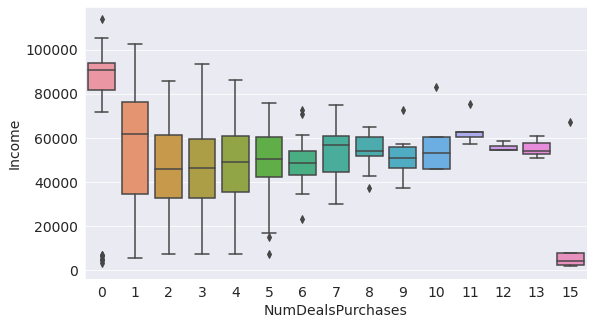

In [ ]:
sns.boxplot(x='NumDealsPurchases', y='Income', data= cleaned_df)

In [ ]:
income.corr(cleaned_df['NumDealsPurchases'], method = 'pearson')

-0.1324266057252856

In [ ]:
from scipy.stats import linregress
linregress(income, cleaned_df['NumDealsPurchases'])

LinregressResult(slope=-1.2058607468846856e-05, intercept=2.940857924665638, rvalue=-0.13242660572528558, pvalue=4.3091574381496003e-10, stderr=1.9229713187964045e-06)

By pearson test we found that the r value is very close to 0 (rvalue = -0.13), therefore, there is no significant relationship between income and coupon usage. But as shown in the boxplot, income ranging from 80000 to 100000 are more likely to purchase without coupon.

##Does the education level have relationship with the product categories they purchase?

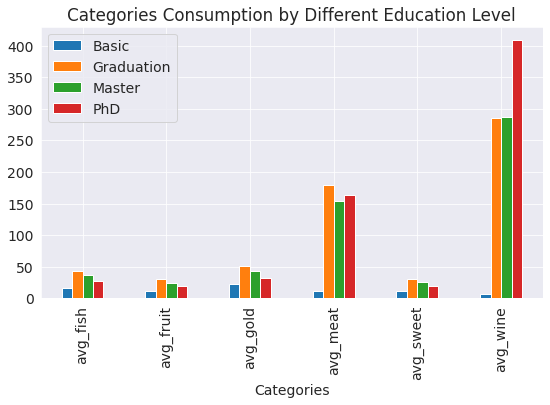

In [ ]:
categories_df = pd.DataFrame()
categories_df['avg_wine'] = cleaned_df.groupby(['Education']).MntWines.mean()
categories_df['avg_fruit'] = cleaned_df.groupby(['Education']).MntFruits.mean()
categories_df['avg_meat'] = cleaned_df.groupby(['Education']).MntMeatProducts.mean()
categories_df['avg_fish'] = cleaned_df.groupby(['Education']).MntFishProducts.mean()
categories_df['avg_sweet'] = cleaned_df.groupby(['Education']).MntSweetProducts.mean()
categories_df['avg_gold'] = cleaned_df.groupby(['Education']).MntGoldProds.mean()

categories_df1 = categories_df.stack().reset_index()

categories_df1.columns = ['Education','Categories', 'Amount']
 
new_df = (categories_df1.pivot_table(index = ['Categories'], columns = ['Education'], values = ['Amount']))
new_df.reset_index()

new_df.columns = ['Basic', 'Graduation', 'Master', 'PhD']



new_df.plot(kind = 'bar')
plt.title('Categories Consumption by Different Education Level')
plt.show()

From the plot we can see that because different education level has different total spent, we should go further to check their categories preference

In [ ]:
#Use anova to examine which categories spent most by different education level


In [ ]:
def anova(education):
  df = cleaned_df.loc[cleaned_df['Education'] == education]
  df = df[['ID','MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
  df = df.set_index('ID')

  f, p = stats.f_oneway(df.MntWines, df.MntFruits, df.MntMeatProducts, df.MntFishProducts,df.MntSweetProducts, df.MntGoldProds)
  print ('One-way ANOVA')
  print ('=============')
 
  print ('F value:', f)
  print ('P value:', p, '\n')

  return df

In [ ]:
#Tukey’s range test
def turkey(df):
  index_list = list(df.index)

  com_df = pd.DataFrame(columns = index_list)

  for i in com_df:
    com_df[i] = df.loc[i]

  com_df = com_df.unstack()
  com_df = com_df.reset_index()
  com_df.columns = ['ID', 'Categories', 'Amount']

  mc = MultiComparison(com_df['Amount'], com_df['Categories'])
  result = mc.tukeyhsd()
 
  print(result)

In [ ]:
basic_df = anova('Basic')

One-way ANOVA
F value: 2.664049984123052
P value: 0.0223689721356079 



The result shows that not all categories are equal since p = 0.02 < 0.05, we need further examination

In [ ]:
turkey(basic_df)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
 MntFishProducts        MntFruits  -5.9444 0.7869 -19.5824  7.6935  False
 MntFishProducts     MntGoldProds   5.7778  0.807  -7.8602 19.4157  False
 MntFishProducts  MntMeatProducts  -5.6111 0.8271 -19.2491  8.0269  False
 MntFishProducts MntSweetProducts  -4.9444    0.9 -18.5824  8.6935  False
 MntFishProducts         MntWines  -9.8148 0.3093 -23.4528  3.8232  False
       MntFruits     MntGoldProds  11.7222 0.1377  -1.9157 25.3602  False
       MntFruits  MntMeatProducts   0.3333    0.9 -13.3046 13.9713  False
       MntFruits MntSweetProducts      1.0    0.9  -12.638  14.638  False
       MntFruits         MntWines  -3.8704    0.9 -17.5083  9.7676  False
    MntGoldProds  MntMeatProducts -11.3889 0.1614 -25.0269  2.2491  False
    MntGoldProds MntSweetProducts -10.

From the result we can find that there is significant difference between Gold consumption and wine consumption, but all other results are not significant for basic education level group

In [ ]:
#For graduation level
grad_df = anova('Graduation')

One-way ANOVA
F value: 475.68244571077065
P value: 0.0 



The p value is verry small (p=0), so there is significant different between categories spent

In [ ]:
turkey(grad_df)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
     group1           group2       meandiff p-adj    lower     upper   reject
-----------------------------------------------------------------------------
 MntFishProducts        MntFruits   -12.593 0.4432  -32.1232    6.9373  False
 MntFishProducts     MntGoldProds    7.2839 0.8949  -12.2463   26.8142  False
 MntFishProducts  MntMeatProducts  135.7889  0.001  116.2586  155.3191   True
 MntFishProducts MntSweetProducts  -12.1563 0.4832  -31.6866    7.3739  False
 MntFishProducts         MntWines  242.2803  0.001  222.7501  261.8106   True
       MntFruits     MntGoldProds   19.8769 0.0433    0.3467   39.4072   True
       MntFruits  MntMeatProducts  148.3819  0.001  128.8516  167.9121   True
       MntFruits MntSweetProducts    0.4367    0.9  -19.0936   19.9669  False
       MntFruits         MntWines  254.8733  0.001  235.3431  274.4036   True
    MntGoldProds  MntMeatProducts  128.5049  0.001  108.9747  14

In [ ]:

#For master level
mas_df = anova('Master')

One-way ANOVA
F value: 231.14022422908832
P value: 1.225878009963759e-212 



In [ ]:
turkey(mas_df)

            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
     group1           group2       meandiff p-adj    lower    upper   reject
----------------------------------------------------------------------------
 MntFishProducts        MntFruits  -13.2028  0.737  -41.3669  14.9612  False
 MntFishProducts     MntGoldProds    5.2011    0.9  -22.9629  33.3651  False
 MntFishProducts  MntMeatProducts  116.3221  0.001   88.1581 144.4861   True
 MntFishProducts MntSweetProducts  -11.6566 0.8273  -39.8206  16.5074  False
 MntFishProducts         MntWines  250.1032  0.001  221.9392 278.2672   True
       MntFruits     MntGoldProds   18.4039 0.4273   -9.7601  46.5679  False
       MntFruits  MntMeatProducts  129.5249  0.001  101.3609 157.6889   True
       MntFruits MntSweetProducts    1.5463    0.9  -26.6177  29.7103  False
       MntFruits         MntWines   263.306  0.001   235.142 291.4701   True
    MntGoldProds  MntMeatProducts   111.121  0.001    82.957  139.285   True

In [ ]:
#For PhD level
phd_df = anova('PhD')

One-way ANOVA
F value: 343.7401135829054
P value: 8.334133697738686e-289 



In [ ]:
turkey(phd_df)

            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
     group1           group2       meandiff p-adj   lower     upper   reject
----------------------------------------------------------------------------
 MntFishProducts        MntFruits   -6.8845   0.9  -40.8143   27.0454  False
 MntFishProducts     MntGoldProds    5.3592   0.9  -28.5706   39.2891  False
 MntFishProducts  MntMeatProducts  136.6744 0.001  102.7445  170.6042   True
 MntFishProducts MntSweetProducts   -6.4853   0.9  -40.4151   27.4446  False
 MntFishProducts         MntWines  382.6765 0.001  348.7466  416.6063   True
       MntFruits     MntGoldProds   12.2437   0.9  -21.6862   46.1735  False
       MntFruits  MntMeatProducts  143.5588 0.001   109.629  177.4887   True
       MntFruits MntSweetProducts    0.3992   0.9  -33.5307    34.329  False
       MntFruits         MntWines  389.5609 0.001  355.6311  423.4908   True
    MntGoldProds  MntMeatProducts  131.3151 0.001   97.3853   165.245   True

##regression: what kind of customers is more likely to spend more

In [ ]:
reg_df = cleaned_df.copy()

In [ ]:
# Since there are categorical variables exist, we firstly need to convert them into dummy variables
reg_df = pd.get_dummies(reg_df, drop_first = True)
print (reg_df)

         ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  Child  total_amount_spent  Education_Graduation  Education_Master  Education_PhD  Marital_Status_Relationship  Marital_Status_Single
0      5524        1957  58138.0        0         0  2012-04-09       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0              3         11         1      0                1617                     1                 0              0                            0              

In [ ]:
#We would like to convert the date they join into how long they join, lets set 2015-01-01
from datetime import date
import datetime as dt
reg_df['D1'] = date(2015, 1, 1)
reg_df['Dt_Customer'] = pd.to_datetime(reg_df['Dt_Customer'])

reg_df['delta'] = (pd.to_datetime(reg_df['D1']) - pd.to_datetime((reg_df['Dt_Customer']))).dt.days

In [ ]:
#some variables can be deleted
reg_df = reg_df.drop(columns = ['D1', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'])
print (reg_df)

         ID  Year_Birth   Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Child  total_amount_spent  Education_Graduation  Education_Master  Education_PhD  Marital_Status_Relationship  Marital_Status_Single  delta
0      5524        1957  58138.0       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0         1      0                1617                     1                 0              0                            0                      1    997
1      2174        1954  46344.0       38        11          1                6           

In [ ]:
head = reg_df.columns
print (head)

Index(['ID', 'Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Child', 'total_amount_spent', 'Education_Graduation', 'Education_Master', 'Education_PhD', 'Marital_Status_Relationship', 'Marital_Status_Single', 'delta'], dtype='object')


In [ ]:

X = reg_df[['Year_Birth', 'Income', 'Recency',  'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Child', 'Education_Graduation', 'Education_Master', 'Education_PhD', 'Marital_Status_Relationship', 'Marital_Status_Single', 'delta']]
y = reg_df['total_amount_spent']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
#print(est2.summary())


In [ ]:
lr=linear_model.LinearRegression()
lr.fit (X = X, y = y)
print(f'model score: {lr.score(X, y)}') 

model score: 0.8220479973449152


In [ ]:
intercept = lr.intercept_
features = pd.DataFrame(lr.coef_, X.columns, columns=['coefficient'])
features

,coefficient
Year_Birth,1.509321
Income,0.014602
Recency,0.240288
NumDealsPurchases,5.599278
NumWebPurchases,12.979311
NumCatalogPurchases,70.480625
NumStorePurchases,19.668997
NumWebVisitsMonth,22.693954
Complain,-70.102933
Child,-137.306341


The linear regression model we built has a good explanation to the total spent of our customers. We would also like to measure which factor is more important for their spent, so we need to standardize the regression coefficient to make the comparison.

<BarContainer object of 16 artists>

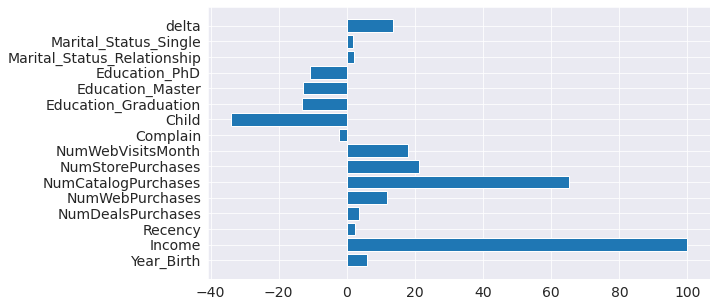

In [ ]:
stdevs = []
for i in X.columns:
    stdev = reg_df[i].std()
    stdevs.append(stdev)
 
features["stdev"] = np.array(stdevs).reshape(-1,1)
features["importance"] = features["coefficient"] * features["stdev"]

features['importance_normalized'] = 100*features['importance'] / features['importance'].max()

plt.barh(features.index, features.importance_normalized)

From the plot we could find that the income, catalogue and the children are the top 3 impact to customers' spent. More income means spend more; the catalogue is also a good channel to promote our store; People with more children at home may be more likely to be more economy when they make purchases.

##Clustering: What makes an ideal customer

In [ ]:
#We would like to have a segmentation based on customer's geodemographics and behaviors data
c_df = cleaned_df.copy()
c_df['Response'] = c_df['AcceptedCmp3']+c_df['AcceptedCmp2']+c_df['AcceptedCmp4']+c_df['AcceptedCmp1']+c_df['AcceptedCmp5']+c_df['Response']
c_df['D1'] = date(2015, 1, 1)
c_df['Dt_Customer'] = pd.to_datetime(c_df['Dt_Customer'])

c_df['delta'] = (pd.to_datetime(c_df['D1']) - pd.to_datetime((c_df['Dt_Customer']))).dt.days
c_df = c_df.drop(columns = ['AcceptedCmp3', 'AcceptedCmp2', 'AcceptedCmp1', 'AcceptedCmp4', 'AcceptedCmp5', 'Z_CostContact', 'Z_Revenue', 'Kidhome', 'Teenhome', 'Dt_Customer', 'D1'])
c_df = c_df.set_index('ID')

c_df = pd.get_dummies(c_df, columns = ['Marital_Status'], drop_first = True)

enc = OrdinalEncoder()
X = [['Basic', 0], ['Graduation', 1], ['Master', 2], ['PhD', 3]]
enc.fit(X)
c_df[["Education"]] = enc.fit_transform(c_df[['Education']])

print (c_df)

       Year_Birth  Education   Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  Response  Child  total_amount_spent  delta  Marital_Status_Relationship  Marital_Status_Single
ID                                                                                                                                                                                                                                                                                                                                            
5524         1957        1.0  58138.0       58       635         88              546              172                88            88                  3                8                   10                  4                  7         0         1      0                1617    997                            0                   

In [ ]:
ss = StandardScaler()
ss.fit(c_df)
ssdf1 = pd.DataFrame(ss.transform(c_df),columns= c_df.columns )
ssdf1.head()

,Year_Birth,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Child,total_amount_spent,delta,Marital_Status_Relationship,Marital_Status_Single
0,-1.017189,-0.788901,0.314651,0.310830,0.974566,1.548614,1.748400,2.449154,1.480301,0.849556,0.361479,1.424772,2.628526,-0.562650,0.689203,-0.095673,0.614920,-1.266589,1.679323,1.974128,-0.591841,1.461697
1,-1.273530,-0.788901,-0.254877,-0.380600,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,-0.735767,-0.168834,-1.132957,-0.588043,-1.179732,-0.139645,-0.095673,-0.503808,1.403420,-0.963897,-1.664957,-0.591841,1.461697
2,-0.333612,-0.788901,0.965354,-0.795458,0.355155,0.568110,-0.175957,1.336263,-0.149031,-0.039771,-0.699147,1.424772,-0.230646,1.288596,-0.554069,-0.095673,-0.503808,-1.266589,0.281242,-0.172330,1.689643,-0.684136
3,1.289883,-0.788901,-1.206087,-0.795458,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,-0.755100,-0.168834,-0.767567,-0.945440,-0.562650,0.274779,-0.095673,-0.503808,0.068415,-0.920675,-1.923048,1.689643,-0.684136
4,1.033542,1.594013,0.322136,1.555404,-0.394659,0.417263,-0.217292,0.150396,-0.003121,-0.561768,1.422105,0.328602,0.126750,0.054432,-0.139645,-0.095673,-0.503808,0.068415,-0.307248,-0.821859,-0.591841,-0.684136


In [ ]:
print ('The original data has %d dimensions'%(ssdf1.shape[1]))
pca = PCA(n_components = ssdf1.shape[1])
pca.fit(ssdf1)
newX = pca.transform(ssdf1)
print ('Proportion Var:',pca.explained_variance_ratio_ )
print ('SS Loadings:',pca.explained_variance_  )

The original data has 22 dimensions
Proportion Var: [3.34390387e-01 8.75425275e-02 6.64685843e-02 6.31895441e-02
 5.26870890e-02 4.57428592e-02 4.52798504e-02 3.78881089e-02
 3.68646523e-02 3.02571012e-02 2.82124394e-02 2.70625252e-02
 2.60125307e-02 2.09229637e-02 1.95724535e-02 1.78318512e-02
 1.71310496e-02 1.47190372e-02 1.20938912e-02 9.87600000e-03
 6.25455388e-03 2.34791297e-32]
SS Loadings: [7.35992636e+00 1.92680944e+00 1.46297233e+00 1.39080072e+00
 1.15964187e+00 1.00679950e+00 9.96608686e-01 8.33916590e-01
 8.11390328e-01 6.65958247e-01 6.20955279e-01 5.95645689e-01
 5.72535329e-01 4.60514050e-01 4.30789346e-01 3.92478721e-01
 3.77054091e-01 3.23965742e-01 2.66186326e-01 2.17370581e-01
 1.37662617e-01 5.16775219e-31]


Six components' eigenvalues are more than 1, so we choose these components for the next step

In [ ]:
pca = PCA(n_components = 6)
pca.fit(ssdf1)
pca_df = pd.DataFrame(pca.transform(ssdf1), columns = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6' ])

In [ ]:
print ('Proportion Var:',pca.explained_variance_ratio_)
print ('Cumulative Var:', pca.explained_variance_ratio_.sum())

Proportion Var: [0.33439039 0.08754249 0.06646839 0.06318887 0.052685   0.04574134]
Cumulative Var: 0.6500164679635723


In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

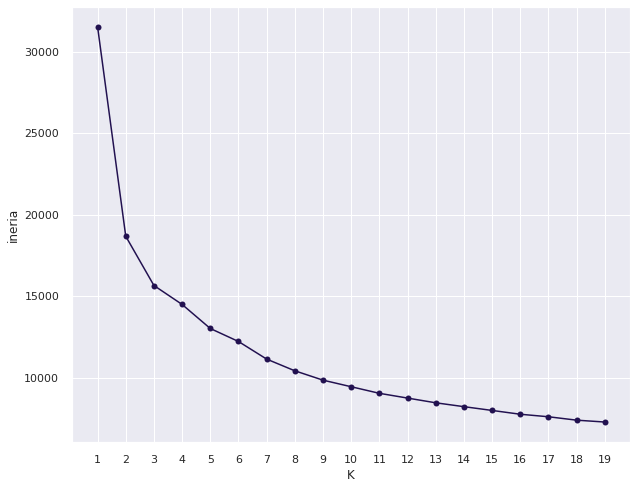

In [ ]:
k = range(1,20)
inertias = []

for i in k:
  model = KMeans(n_clusters=i)
  model.fit(pca_df)
  inertias.append(model.inertia_)


plt.plot(k, inertias, '-o')
plt.xlabel('K')
plt.ylabel('ineria')
plt.xticks(k)
plt.show()

The plot shows that there is big jump between 3 and 4, so we choose 3 as the amount of centers

In [ ]:
k_means = KMeans(n_clusters = 3, random_state = 50)
y_pred = k_means.fit_predict(pca_df)
pca_df['Cluster'] = y_pred

In [ ]:
cleaned_df['Cluster'] = y_pred
print (c_df)

       Year_Birth  Education   Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  Response  Child  total_amount_spent  delta  Marital_Status_Relationship  Marital_Status_Single  Cluster
ID                                                                                                                                                                                                                                                                                                                                                     
5524         1957        1.0  58138.0       58       635         88              546              172                88            88                  3                8                   10                  4                  7         0         1      0                1617    997                            0 

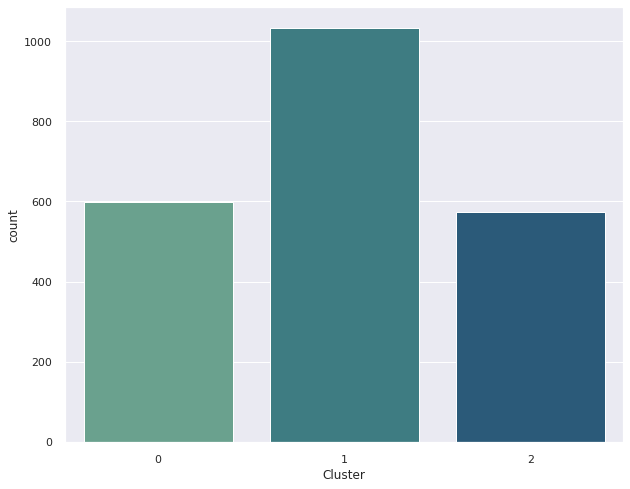

In [ ]:
sns.countplot(x = cleaned_df['Cluster'], palette = 'crest')

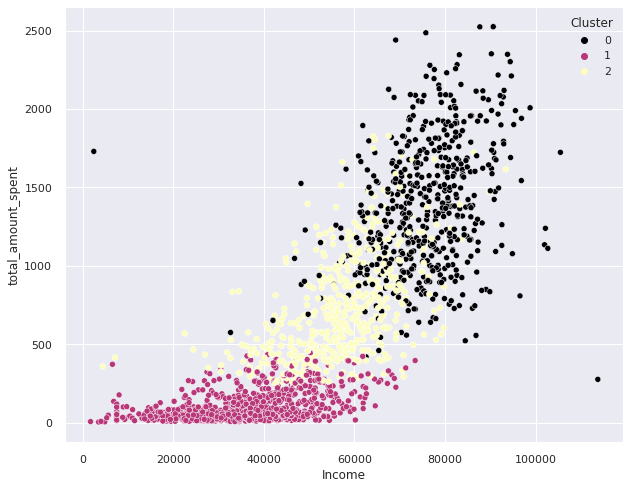

In [ ]:
sns.set(rc = {'figure.figsize':(10,8)}, palette = 'magma')
sns.scatterplot(data=cleaned_df, x='Income', y='total_amount_spent', hue='Cluster',palette = 'magma')

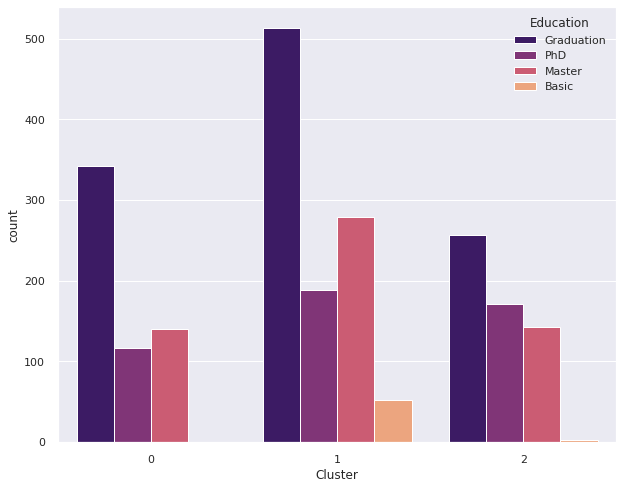

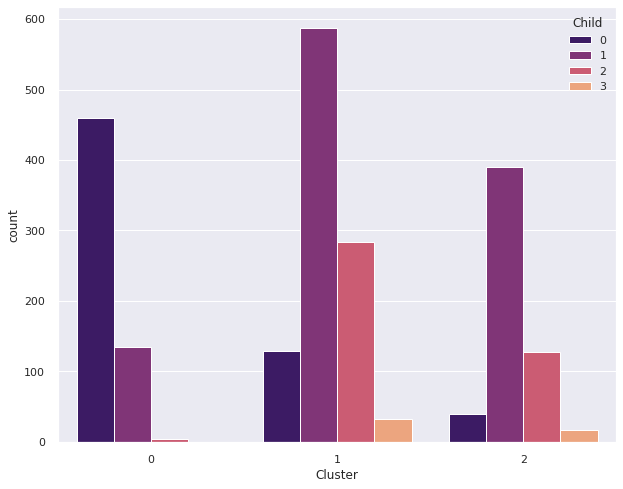

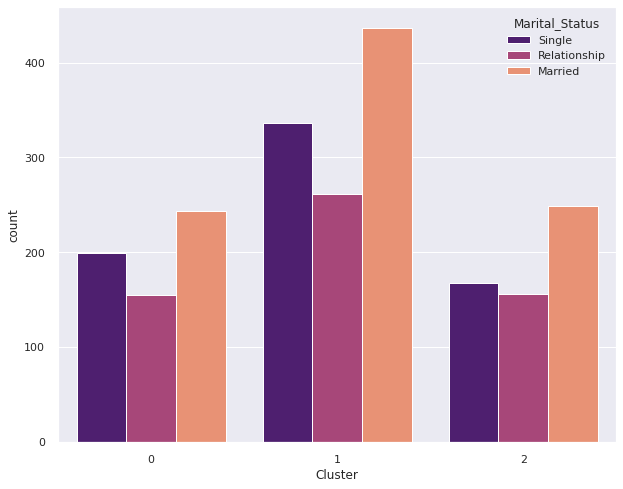

In [ ]:
profile = ['Education', 'Child', 'Marital_Status']

for i in profile:
  plt.figure()
  sns.countplot(x='Cluster', data=cleaned_df, hue=cleaned_df[i],palette = 'magma')
  plt.show()

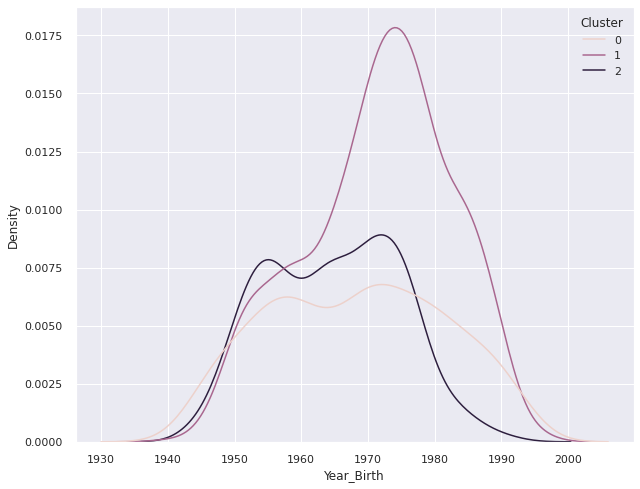

In [ ]:
sns.kdeplot(data=cleaned_df, x='Year_Birth', hue='Cluster')

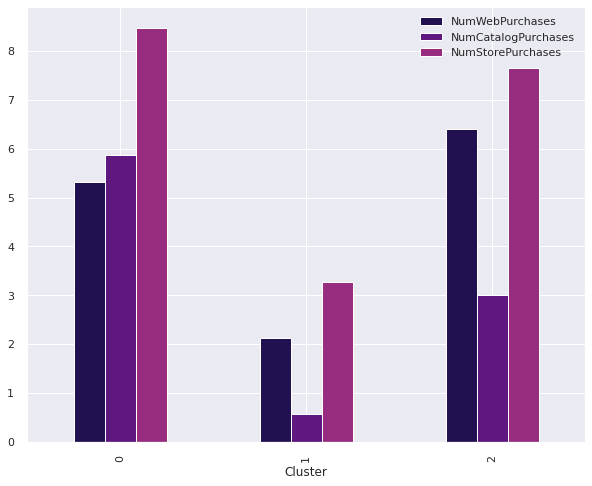

In [ ]:
cleaned_df.groupby('Cluster')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].agg('mean').plot(kind='bar')

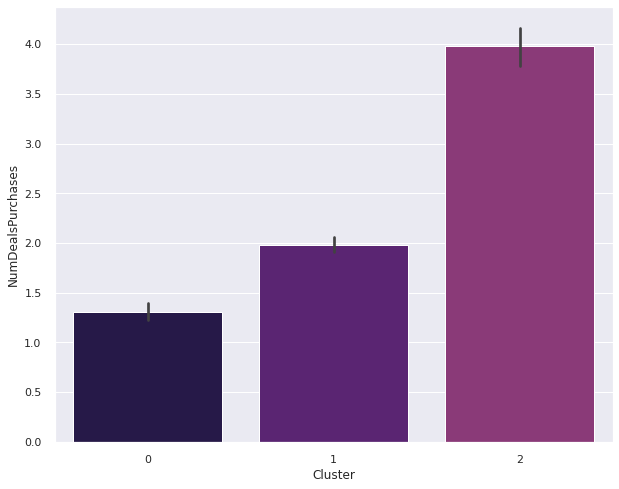

In [ ]:
sns.barplot(y=cleaned_df['NumDealsPurchases'], x=cleaned_df.Cluster)

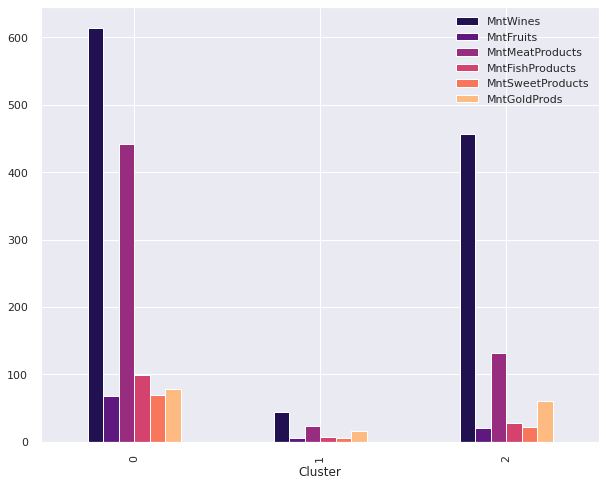

In [ ]:
cleaned_df.groupby('Cluster')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].agg('mean').plot(kind='bar')